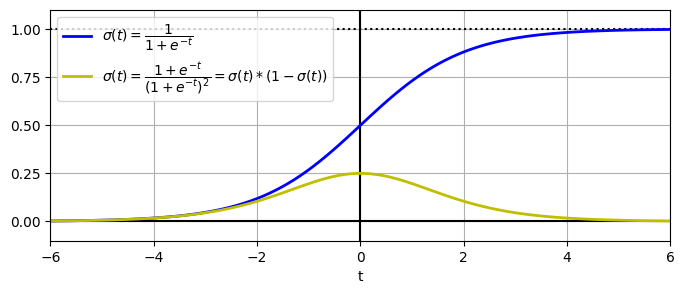

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))
sig_prime = np.exp(-t)/np.square(1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.plot(t, sig_prime, "y-", linewidth=2, label=r"$\sigma(t) = \dfrac{1 + e^{-t}}{(1 + e^{-t})^2} = \sigma(t)*(1 - \sigma(t))$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

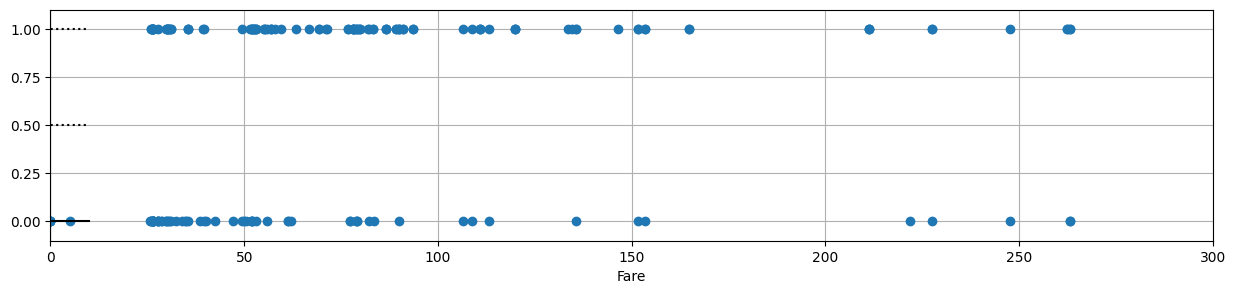

In [50]:
titanic = pd.read_csv('Titanic.csv')


third = titanic.query("Pclass==3")
second = titanic.query("Pclass==2")
first = titanic.query("Pclass==1")

third = third.sample(frac = second.size/third.size, axis='index')
first = first.sample(frac=second.size/first.size)

#titanic = pd.concat([first, second, third])
titanic = first

t = np.linspace(0, 100, 100)
sig = 1 / (1 + np.exp(-(t-50)/5))

plt.figure(figsize=(15, 3))
plt.plot(titanic["Fare"], titanic["Survived"], 'o')
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
#plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("Fare")
plt.axis([0, 300, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()


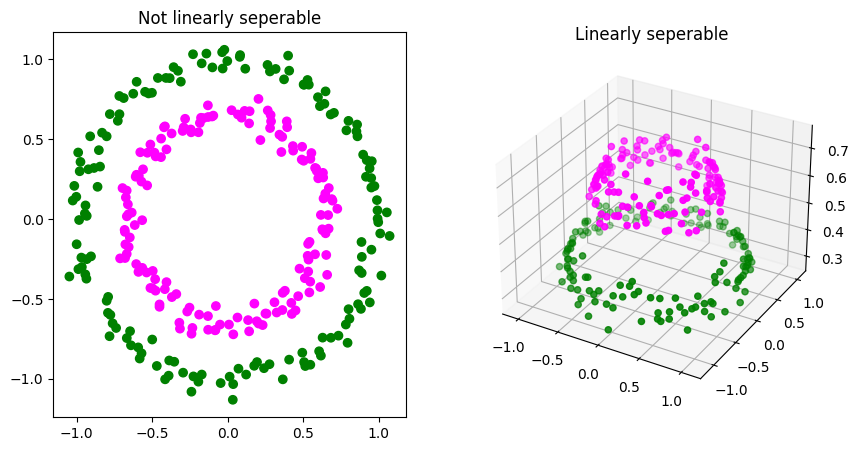

In [8]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap
from math import exp, exp2
colors = ListedColormap(['green', 'magenta'])

X_circles, y_circles = make_circles(n_samples=300, factor=.65, noise = .05)

X3 = np.array([exp(-(x1**2 + x2**2)) for x1, x2 in X_circles])

figure = plt.figure(figsize=(10, 5))

ax = figure.add_subplot(1, 2, 1, title='Not linearly seperable')
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap=colors)

ax = figure.add_subplot(1, 2, 2, title='Linearly seperable', projection='3d')
ax.scatter(X_circles[:, 0], X_circles[:, 1], X3, c=y_circles, cmap=colors)


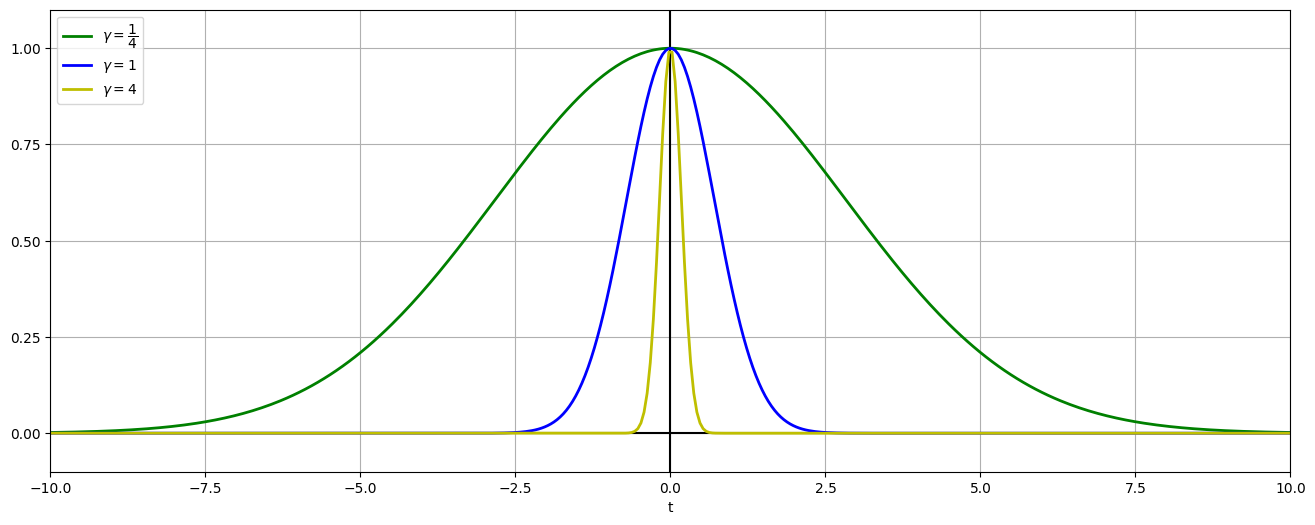

In [9]:
lim = 10
t = np.linspace(-lim, lim, 400)
gauss12 = np.exp(-(t/4)**2)
gauss = np.exp(-t**2)
gauss2 = np.exp(-(t*4)**2)

plt.figure(figsize=(16, 6))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, gauss12, "g-", linewidth=2, label=r"$\gamma = \dfrac{1}{4}$")
plt.plot(t, gauss, "b-", linewidth=2, label=r"$\gamma = 1$")
plt.plot(t, gauss2, "y-", linewidth=2, label=r"$\gamma = 4$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()